In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

def load_data():
    df = pd.read_csv('phq_all_final.csv')
    return df

In [93]:
df = load_data()

In [94]:
def show_indiv_progress_byday(p_id):
    """
    displays score history of individual patient
    p_id: patient id (int)
    output: plot (x=day, y=score), red line = clinical evaluation recommended
    """
    data = df[df['patient_id'] == p_id]
    data[['day', 'time']] = data["date"].str.split("T", n = 1, expand = True)
    data['day'] = pd.to_datetime(data['day'])
    data.groupby('day')['score'].mean().plot(rot=70) # if there are more than one reports in a day, takes its mean
    plt.axhline(y=10, color='r', linestyle='-') 
    plt.xlabel("Date")
    plt.ylabel("GAD7 Score")


For example, this plot shows that this patient (7561) has generally improved over the past half year.

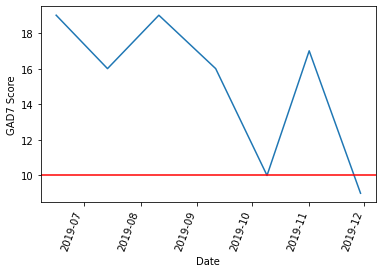

In [95]:
show_indiv_progress_byday(7561)

In [96]:
def show_indiv_trend_bytime(p_id):
    """
    displays score history of individual patient by hour
    p_id: patient id (int)
    output: plot (x=day, y=score)
    """
    data = df[df['patient_id'] == p_id]
    data[['day', 'time_stamp']] = data["date"].str.split("T", n = 1, expand = True)
    splt_char = ':'
    data[['hour', 'minute', 'second']] = data["time_stamp"].str.split(splt_char, n = 2, expand = True)
    data.groupby('hour')['score'].mean().plot.bar()
    plt.axhline(y=10, color='r', linestyle='-')
    plt.xlabel("Time of Day")
    plt.ylabel("GAD7 Score")

For example, this plot shows that this patient(7561) has worse scores in the evenings.

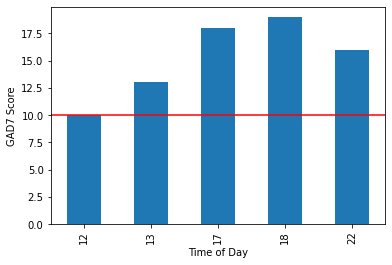

In [97]:
show_indiv_trend_bytime(7561)

In [98]:
def show_monthly_mean():
    """
    Show mean severity scores (monthly) among all patients.
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['month'] = pd.to_datetime(df['day']).dt.to_period('M')
    df.groupby('month')['score'].mean().plot.bar()
    plt.xlabel("Month")
    plt.ylabel("Mean GAD7 Score")


This measurement needs records from longer period of time to actually detect seasonal trend.

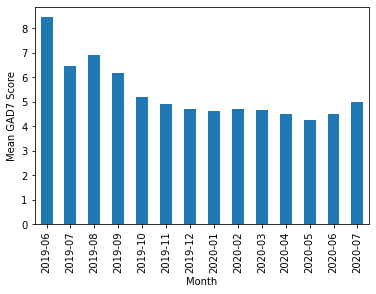

In [99]:
show_monthly_mean()

In [100]:
def show_monthly_count():
    """
    Show the number of activity records (monthly) among all patients
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['month'] = pd.to_datetime(df['day']).dt.to_period('M')
    df.groupby('month')['score'].count().plot.line()
    plt.xlabel("Month")
    plt.ylabel("Number of reports")


This plot visualizes the growth of the assessment. 
It shows that there was a significant increase in the number of assessments taken.

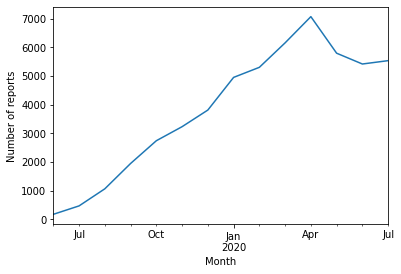

In [101]:
show_monthly_count()

In [102]:
def show_time_trend_mean():
    """
    Show the mean severity scores among all patients by hour
    """  
    df[['day', 'time_stamp']] = df["date"].str.split("T", n = 1, expand = True)
    splt_char = ':'
    df[['hour', 'minute', 'second']] = df["time_stamp"].str.split(splt_char, n = 2, expand = True)
    df.groupby('hour')['score'].mean().plot.bar()
    plt.axhline(y=10, color='r', linestyle='-')


This shows that the score is relatively lower when the assessment is taken in the early afternoon.

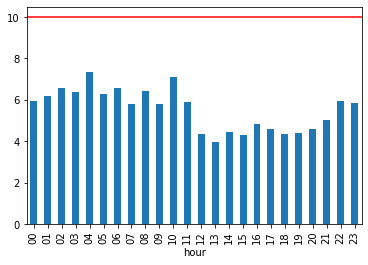

In [103]:
show_time_trend_mean()

In [104]:
def show_time_trend_count():
    """
    Show the number of records among all patients by hour
    """
    df[['day', 'time_stamp']] = df["date"].str.split("T", n = 1, expand = True)
    splt_char = ':'
    df[['hour', 'minute', 'second']] = df["time_stamp"].str.split(splt_char, n = 2, expand = True)
    df.groupby('hour')['score'].count().plot.bar()

Most patients take the assessments in the early afternoon.

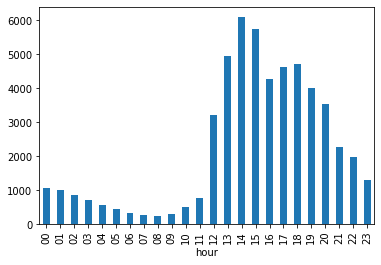

In [105]:
show_time_trend_count()

In [106]:
def progress_by_length():
    """
    Group data with the length of treatment (after 1 month, 2 months etc)
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['day'] = pd.to_datetime(df['day'])
    patients = df.groupby('patient_id')
    startdf = patients.agg(start_date=('day', np.min)) #find each patient's start date
    startdf.reset_index(inplace = True)
    merged = pd.merge(df, startdf, how="left", on=["patient_id"]) #join two dfs
    merged['num_month'] = (merged['day'] - merged['start_date'])/np.timedelta64(1, 'M') #calculate how long it's been
    merged.groupby('num_month')['score'].mean().plot.line()
    plt.xlabel("Number of Months")
    plt.ylabel("Mean GAD7 Score")


This shows the trend of decrease in the score after a couple of months of treatment.
This helps us visualize the effectiveness of treatment.

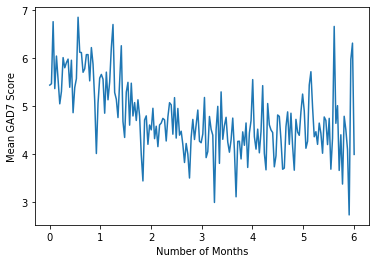

In [107]:
progress_by_length()

In [108]:
def progress_by_severeness(low, high):
    """
    Group data with the length of treatment (after 1 month, 2 months etc)
    The same as the previous function (progress_by_length) but can specify the range for severeness
    low: score low range
    high: score high range
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['day'] = pd.to_datetime(df['day'])
    patients = df.groupby('patient_id')
    startdf = patients.agg(start_date=('day', np.min)) #find each patient's start date
    startdf.reset_index(inplace = True)
    merged = pd.merge(df, startdf, how="left", on=["patient_id"]) #join two dfs
    merged['num_month'] = (merged['day'] - merged['start_date'])/np.timedelta64(1, 'M') #calculate how long it's been
    group = merged[(merged['score'] <= high) & (merged['score'] >= low)]
    group.groupby('num_month')['score'].mean().plot.line()    
    plt.xlabel("Number of Months")
    plt.ylabel("Mean GAD7 Score")


This helps us understand how severeness and improvement are correlated (lower range shows more improvement over time)

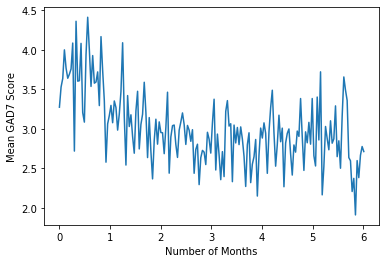

In [109]:
progress_by_severeness(0, 10)

In [110]:
def retention():
    """
    Shows how many people continued the assessments after some number of months
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['day'] = pd.to_datetime(df['day'])
    patients = df.groupby('patient_id')
    startdf = patients.agg(start_date=('day', np.min)) #find each patient's start date
    startdf.reset_index(inplace = True)
    merged = pd.merge(df, startdf, how="left", on=["patient_id"]) #join two dfs
    merged['num_month'] = (merged['day'] - merged['start_date'])/np.timedelta64(1, 'M') #calculate how long it's been
    merged.groupby('num_month')['date'].count().plot.line()
    plt.xlabel("Number of Months")
    plt.ylabel("Number of reports")

This shows that a lot of users complete the activity once a month, with significant decrease over time.
This helps us improve user retainment rate.

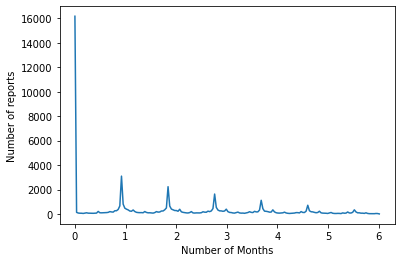

In [111]:
retention()

Assumptions that I made:
* All patients are getting the same treatment.
* Date/time data is in patients' time zone.

Additional pieces of information that would be important
* More information about treatment (i.e. amount, type) to understand how it influences the score
* More information about patients (i.e. age) to find patterns and suited treatments for each group of patients
